<a href="https://colab.research.google.com/github/HongYeongPyo/first-repository/blob/05%EB%A8%B8%EC%8B%A0%2B06%EC%8B%9C%EA%B3%84%EC%97%B4/6%EC%8B%9C%EA%B3%84%EC%97%B4_5%EB%AF%B8%EB%8B%88_250523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6시계열 5미니 프로젝트 250523
    - 아래의 순서대로 코드 실습이 진행됩니다.
    - 코드를 실행하는 부분이 어떤 순서에 해당하는지 천천히 확인해보세요.


- ① 비정상 데이터를 정상 데이터로 만들기
- ② 분산을 일정하게 만들기 - log transformation
- ③ 차분을 통해 추세 제거하기
- ④ (추가) 계절 차분을 통해 계절성 제거하기
- ⑤ 검정을 통해 정상성 확인하기
- ⑥ 시계열 분류


    - ⑥-1 : 데이터 다운로드 및 불러오기
    - ⑥-2 : 데이터셋 확인(timeseries와 y 확인)
    - ⑥-3 : 데이터셋 가공
    - ⑥-4 : 데이터셋 나누기
    - ⑥-5 : Feature extraction
    - ⑥-6 : impute
    - ⑥-7 : RandomForest 및 XGBoost 사용 및 score 확인
    - ⑥-8 : XGBoost plot_importance 확인 및 시각화
    - ⑥-9 : Classification report를 통한 검증 및 분석

### ① 비정상 데이터를 정상 데이터로 만들기
    - 데이터가 있는 폴더 연결하기
    - tsfresh 설치
    - 런타임 재시작
    - 필요한 라이브러리 불러오기
    - 데이터 불러오기

In [ ]:
# # 먼저 데이터가 저장된 폴더를 연결합시다. /LMS
# !mkdir -p aiffel/time_series_basic
# !cp data/AirPassengers.csv aiffel/time_series_basic/

In [ ]:
from google.colab import drive
drive.mount('/content/time_series_basic')

Drive already mounted at /content/time_series_basic; to attempt to forcibly remount, call drive.mount("/content/time_series_basic", force_remount=True).


In [ ]:
!pip install tsfresh

In [ ]:
# # 라이브러리 버전 충돌을 피하기 위해 런타임을 재시작합니다.
# import os
# os.kill(os.getpid(), 9)

In [ ]:
# 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# # air passengers 데이터를 불러옵니다.
ap = pd.read_csv('/content/time_series_basic/MyDrive/content/time_series_basic/AirPassengers.csv')



In [ ]:
ap.info()
ap.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# 'Month' column을 삭제합니다.
# [[YOUR CODE]]

ap = ap.drop('Month', axis=1)
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


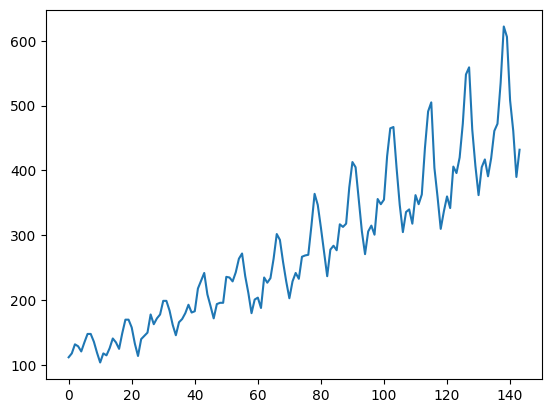

In [ ]:
plt.figure()
plt.plot(ap)
plt.show()

### ② 분산을 일정하게 만들기 - log transformation
  - log transformation을 하는 이유는 다음과 같습니다.

        - 큰 수를 같은 비율의 작은 수로 만들 수 있습니다.
        - 복잡한 계산을 쉽게 만듭니다.
        - 왜도(skewness)와 첨도(kurtosis)를 줄여서 데이터 분석 시 의미있는 결과를 도출하기 위한 것입니다.

In [ ]:
# np.log를 통해서 log transformation
#log_transformed = # [[YOUR CODE]]

import numpy as np

log_transformed = np.log(ap['#Passengers'])
log_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


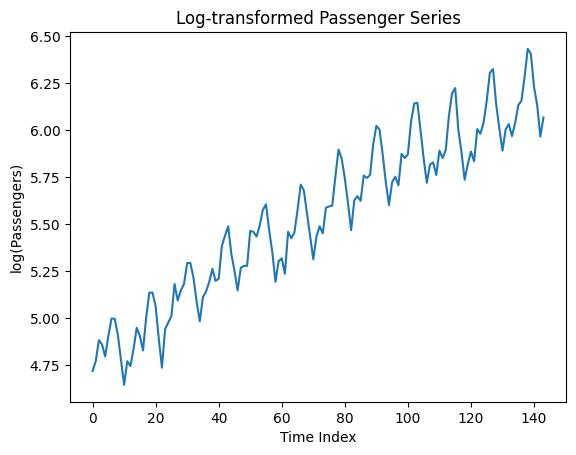

In [ ]:
# # 분산이 일정해진 것을 눈으로 확인할 수 있습니다.
# plt.figure()
# plt.plot(#[[YOUR CODE]])
# plt.show()


plt.figure()
plt.plot(log_transformed)

plt.title("Log-transformed Passenger Series")
plt.xlabel("Time Index")
plt.ylabel("log(Passengers)")

plt.show()

### ③ 차분을 통해 추세 제거하기

In [ ]:
# # diff() 함수를 통해 간단하게 차분을 수행할 수 있습니다.
# diffed = # [[YOUR CODE]]

diffed = log_transformed.diff()
diffed

,#Passengers
0,NaN
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


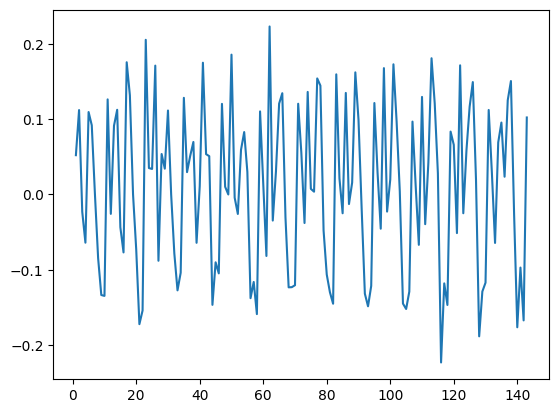

In [ ]:
# # 커지는 분산과 증가하는 추세를 제거한 air passengers 데이터를 얻을 수 있습니다.
# plt.figure()
# plt.plot(#[[YOUR CODE]])
# plt.show()


plt.figure()
plt.plot(diffed)
plt.show()

### ④ (추가) 계절 차분을 통해 계절성 제거하기
- AirPassengers 데이터는 12개월을 주기로 하는 계절성이 포함되어 있습니다.
- 이런 경우엔 계절 차분을 통해서 계절성을 데이터에서 제거할 수 있습니다.

In [ ]:
# diff에 12라는 값을 넣어주면 주기를 12로 하는 계절 차분을 수행할 수 있다.
seasonally_diffed = diffed.diff(12)

# 차분을 하면 데이터가 짧아지기 때문에 빈 킨을 제거해야 한다.
seasonally_diffed.dropna(inplace = True)

In [ ]:
# 형태 확인
seasonally_diffed

,#Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


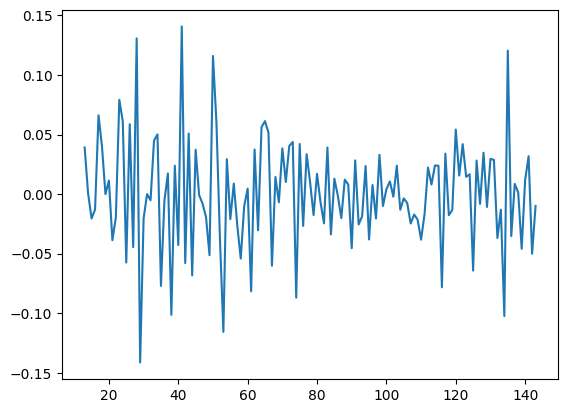

In [ ]:
plt.figure()
plt.plot(seasonally_diffed)
plt.show()

### ⑤ 검정을 통해 정상성 확인하기

- adfuller : Python에서 statsmodels을 통해 ADF(Augmented Dickey-Fuller) Test를 할 수 있습니다.
- 앞서 Classification report를 통해 Logistic Regression 모델을 검증한 것과 마찬가지로 시계열 데이터를 통계 분석하고 검증할 때 사용합니다.
- adfuller를 사용하면 대표적으로 다음과 같은 값을 얻을 수 있습니다.


     - adf(단위근 검정, Augmented Dickey Fuller) : 정상성을 확인하기 위한 단위근 검정방법
     - p-value(유의 검정) : 관찰된 데이터가 귀무가설이 맞다면 통계값 1이 실제로 관측된 값 이상일 확률
     - usedlag : 사용된 시차의 수
     - nobs : ADF 회귀 및 임계값 계산에 사용된 관측치의 수
     - critical values(임계값) : 1%, 5% 및 10% 수준에서 테스트 통계에 대한 임계값
     - icbest : 0, 1, …, maxlag 값 중 lag 길이를 자동으로 결정할 때 autolag를 사용하며 이때 autolag를 none으로 지정할 수 있는데 none으로 지정하지 않는 경우 최대화된 정보 기준

In [ ]:
from statsmodels.tsa.stattools import adfuller

# def adf_test(x):                                         # adf검정을 위한 함수 정의
#     stat, p_value, lags, nobs, crit, icb = adfuller(x)   # adfuller 함수를 이용하면 6가지 output이 나옵니다.
#     print('ADF statistics')
#     print(stat)                                          # ADF 검정 통계량입니다.
#     print('P-value')
#     print(p_value)                                       # P-value입니다.



from statsmodels.tsa.stattools import adfuller

def adf_test(x):
    stat, p_value, lags, nobs, crit, icb = adfuller(x)
    print(f"ADF statistics : {stat:.6f}")
    print(f"P-value : {p_value:.6f}")

 #  print(f"ADF statistics: {stat:.6f}   |   P-value: {p_value:.6f}")


In [ ]:
# 계절차분까지 수행한 데이터로 adf 테스트를 수행합니다.
# [[YOUR CODE]]

import numpy as np
adf_test(seasonally_diffed)


#===  실행 결과 =================
# 1. ADF Statistic: -4.443   : 이 값은 시계열의 단위근(unit root) 유무를 판단하는 지표. 더 작을수록 (더 음수일수록) 정상성을 강하게 나타낸다.
# 2. p-value: 0.00024   :  0.05보다 작음 → 귀무가설(H₀)을 기각할 수 있음.  귀무가설 H₀: "비정상 시계열이다"⇒ 기각되므로 정상 시계열임이 통계적으로 유의함.

ADF statistics : -4.443325
P-value : 0.000249


### ⑥ 시계열 분류
- 강의 때 Logistic Regression을 이용한 시계열 분류가 낮은 score를 보였습니다.
- 앙상블 모델과 더 많은 특징을 활용해서 분류 성능을 높여봅시다!

In [ ]:
# ⑥-1 : 데이터 다운로드 및 불러오기

from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

# robot exeecution failures  데이터 불러오기
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()


# y : 각 시계열(id)에 대한 정상/실패 여부 (True = 실패, False = 정상)
# 센서 시계열 데이터를 이용해 로봇 동작 실패(True)/정상(False)를 분류하는 모델을 학습하는 것

In [ ]:
# ⑥-2 : 데이터셋 확인(timeseries와 y 확인)
timeseries


# ===  실행 결과 ======
# id, time을 확인하고 6개 column의 X변수가 나타난다.

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [ ]:
timeseries.T

,0,1,2,3,4,5,6,7,8,9,...,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319
id,1,1,1,1,1,1,1,1,1,1,...,88,88,88,88,88,88,88,88,88,88
time,0,1,2,3,4,5,6,7,8,9,...,5,6,7,8,9,10,11,12,13,14
F_x,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-8,-8,-9,-11,-10,-10,-11,-12,-13,-13
F_y,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,2,0,2,3,4,2,2,3,4,2
F_z,63,62,61,63,63,63,63,63,63,61,...,46,46,39,42,40,39,38,23,26,15
T_x,-3,-3,-3,-2,-3,-3,-3,-3,-3,-3,...,-17,-16,-20,-22,-22,-21,-24,-24,-29,-25
T_y,-1,-1,0,-1,-1,-1,0,-1,-1,0,...,-22,-21,-22,-27,-23,-24,-22,-24,-27,-25
T_z,0,0,0,0,0,0,0,0,0,0,...,5,5,5,6,5,5,6,5,5,6


In [ ]:
y

#== 실행 결과 ======
# true / fause

,0
1,True
2,True
3,True
4,True
5,True
...,...
84,False
85,False
86,False
87,False


In [ ]:
y.to_frame().T



,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,88
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(list(y))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [ ]:
y.T


# 전치 연산은 DataFrame에서만 의미가 있다.
# pandas.Series 는 .T를 해도 변화가 없다.

,0
1,True
2,True
3,True
4,True
5,True
...,...
84,False
85,False
86,False
87,False


In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
import pandas as pd
pd.DataFrame(y).T


,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,88
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# ⑥-3 : 데이터셋 가공

def custom_classification_split(x,y,test_size=0.3):

    num_true = int(y.sum()*test_size)
    num_false = int((len(y)-y.sum())*test_size)

    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()

    y_train =  y.drop(id_list)
    y_test = y.iloc[id_list].sort_index()

    X_train = timeseries[~timeseries['id'].isin(id_list)]
    X_test = timeseries[timeseries['id'].isin(id_list)]

    return X_train, y_train, X_test, y_test

In [ ]:
# ⑥-4 : 데이터셋 나누기
# test set의 비율을 0.25로 지정해주세요.
#X_train, y_train, X_test, y_test = # [[YOUR CODE]]


X_train, X_test, y_train, y_test = custom_classification_split(timeseries, y, test_size=0.25)



### EfficientParameters는 큰 계산비용이 필요한 calculator를 제외하고 가능한 모든 특징을 생성합니다.

In [ ]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = EfficientFCParameters()

In [ ]:
# ⑥-5 : Feature extraction
comprehensive_features_train = extract_features(
                                    X_train,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                    )

Feature Extraction: 100%|██████████| 402/402 [00:56<00:00,  7.07it/s]


In [ ]:
# ⑥-5 : Feature extraction
comprehensive_features_test = extract_features(
                                    X_train,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                    )

Feature Extraction: 100%|██████████| 402/402 [00:44<00:00,  9.11it/s]


In [ ]:
comprehensive_features_train

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,NaN,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,NaN,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.022809,2.397895,2.302585,2.197225,NaN,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,NaN,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,1.907284,2.098274,2.302585,2.197225,NaN,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.308605,1.893788,2.163956,2.197225,NaN,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,NaN,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,NaN,40.285714


In [ ]:
comprehensive_features_test

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,NaN,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,NaN,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.022809,2.397895,2.302585,2.197225,NaN,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,NaN,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,1.907284,2.098274,2.302585,2.197225,NaN,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.308605,1.893788,2.163956,2.197225,NaN,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,NaN,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,NaN,40.285714


In [ ]:
print(list(comprehensive_features_train))

['F_x__variance_larger_than_standard_deviation', 'F_x__has_duplicate_max', 'F_x__has_duplicate_min', 'F_x__has_duplicate', 'F_x__sum_values', 'F_x__abs_energy', 'F_x__mean_abs_change', 'F_x__mean_change', 'F_x__mean_second_derivative_central', 'F_x__median', 'F_x__mean', 'F_x__length', 'F_x__standard_deviation', 'F_x__variation_coefficient', 'F_x__variance', 'F_x__skewness', 'F_x__kurtosis', 'F_x__root_mean_square', 'F_x__absolute_sum_of_changes', 'F_x__longest_strike_below_mean', 'F_x__longest_strike_above_mean', 'F_x__count_above_mean', 'F_x__count_below_mean', 'F_x__last_location_of_maximum', 'F_x__first_location_of_maximum', 'F_x__last_location_of_minimum', 'F_x__first_location_of_minimum', 'F_x__percentage_of_reoccurring_values_to_all_values', 'F_x__percentage_of_reoccurring_datapoints_to_all_datapoints', 'F_x__sum_of_reoccurring_values', 'F_x__sum_of_reoccurring_data_points', 'F_x__ratio_value_number_to_time_series_length', 'F_x__maximum', 'F_x__absolute_maximum', 'F_x__minimum',

In [ ]:
print(list(comprehensive_features_test))

['F_x__variance_larger_than_standard_deviation', 'F_x__has_duplicate_max', 'F_x__has_duplicate_min', 'F_x__has_duplicate', 'F_x__sum_values', 'F_x__abs_energy', 'F_x__mean_abs_change', 'F_x__mean_change', 'F_x__mean_second_derivative_central', 'F_x__median', 'F_x__mean', 'F_x__length', 'F_x__standard_deviation', 'F_x__variation_coefficient', 'F_x__variance', 'F_x__skewness', 'F_x__kurtosis', 'F_x__root_mean_square', 'F_x__absolute_sum_of_changes', 'F_x__longest_strike_below_mean', 'F_x__longest_strike_above_mean', 'F_x__count_above_mean', 'F_x__count_below_mean', 'F_x__last_location_of_maximum', 'F_x__first_location_of_maximum', 'F_x__last_location_of_minimum', 'F_x__first_location_of_minimum', 'F_x__percentage_of_reoccurring_values_to_all_values', 'F_x__percentage_of_reoccurring_datapoints_to_all_datapoints', 'F_x__sum_of_reoccurring_values', 'F_x__sum_of_reoccurring_data_points', 'F_x__ratio_value_number_to_time_series_length', 'F_x__maximum', 'F_x__absolute_maximum', 'F_x__minimum',

In [ ]:
import pandas as pd

pd.DataFrame(comprehensive_features_train.columns, columns=["Feature Columns"])


,Feature Columns
0,F_x__variance_larger_than_standard_deviation
1,F_x__has_duplicate_max
2,F_x__has_duplicate_min
3,F_x__has_duplicate
4,F_x__sum_values
...,...
4657,T_z__permutation_entropy__dimension_5__tau_1
4658,T_z__permutation_entropy__dimension_6__tau_1
4659,T_z__permutation_entropy__dimension_7__tau_1
4660,T_z__query_similarity_count__query_None__thres...


In [ ]:
import pandas as pd

pd.DataFrame(comprehensive_features_test.columns, columns=["Feature Columns"])


,Feature Columns
0,F_x__variance_larger_than_standard_deviation
1,F_x__has_duplicate_max
2,F_x__has_duplicate_min
3,F_x__has_duplicate
4,F_x__sum_values
...,...
4657,T_z__permutation_entropy__dimension_5__tau_1
4658,T_z__permutation_entropy__dimension_6__tau_1
4659,T_z__permutation_entropy__dimension_7__tau_1
4660,T_z__query_similarity_count__query_None__thres...


### 결측치 확인


In [ ]:
# comprehensive_features_train

# 1. 결측값이 있는지 여부 (True/False)
comprehensive_features_train.isna().values.any()


np.True_

In [ ]:
#   2. 전체 결측값 개수 확인
comprehensive_features_train.isna().sum().sum()


np.int64(162218)

In [ ]:
# 3. 결측값이 있는 행 개수 확인
comprehensive_features_train.isna().any(axis=1).sum()



np.int64(67)

In [ ]:
#  4. 결측값이 있는 컬럼만 확인
comprehensive_features_train.isna().sum()[comprehensive_features_test.isna().sum() > 0]


,0
F_x__partial_autocorrelation__lag_7,67
F_x__partial_autocorrelation__lag_8,67
F_x__partial_autocorrelation__lag_9,67
F_x__spkt_welch_density__coeff_8,67
F_x__ar_coefficient__coeff_0__k_10,67
...,...
T_z__fourier_entropy__bins_3,1
T_z__fourier_entropy__bins_5,1
T_z__fourier_entropy__bins_10,1
T_z__fourier_entropy__bins_100,1


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


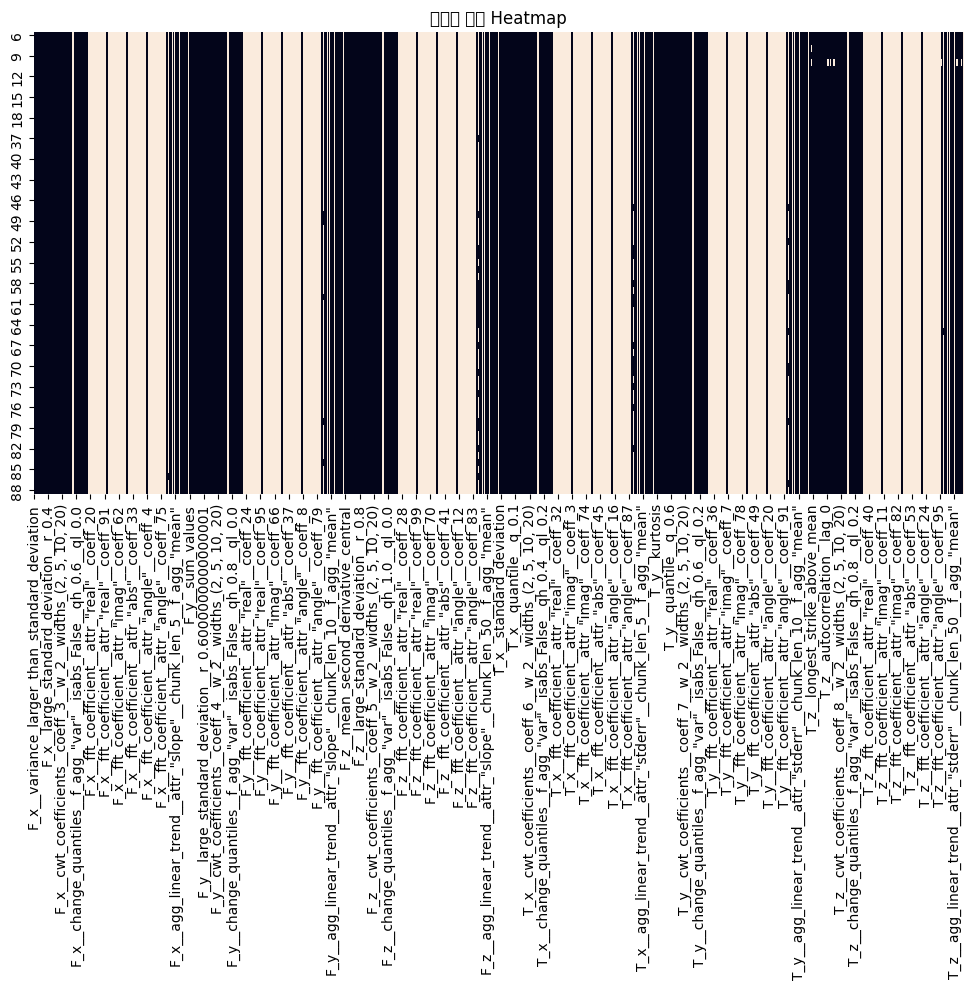

In [ ]:
# 5. 결측치 시각화 - comprehensive_features_train
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(comprehensive_features_train.isna(), cbar=False)

plt.title("결측값 분포 Heatmap")
plt.show()


#===== 수행 결과 ======
# 세로축(y축) : 샘플 인덱스 (6, 7, 8, 9, 10, ...)
# 가로축(x축) : 특성(feature, 열/컬럼) 이름 (총 4662개)
# 검은색 : 해당 셀에 결측값이 존재함 (NaN)
# 살색/밝은색 : 값이 정상적으로 존재함


### 분석 결과 - 많은 특성에 결측치 존재
    - 히트맵에서 세로 방향의 검은 줄이 많다 -  다수의 열(특징)들이 여러 행(샘플)에 대해 결측치를 포함하고 있음을 나타냅니다.  
    - 일부 특성은 모든 샘플에서 결측값 열 전체가 검게 채워진 경우는, 해당 feature가 모든 샘플에서 결측치라는 의미
    - 이런 feature는 모델에 기여할 수 없으므로 제거 대상입니다.

### 데이터 정제 필요 - 다음과 같은 전처리 필요:
    - 결측치가 많은 feature 제거 (예: 50% 이상 NaN)
    - 결측값 대체: 평균/중앙값/0/모드 등으로 대체 (impute() 사용)



In [ ]:
# comprehensive_features_test

# 1. 결측값이 있는지 여부 (True/False)
comprehensive_features_test.isna().values.any()

#   2. 전체 결측값 개수 확인
comprehensive_features_test.isna().sum().sum()

# 3. 결측값이 있는 행 개수 확인
comprehensive_features_test.isna().any(axis=1).sum()

#  4. 결측값이 있는 컬럼만 확인
comprehensive_features_test.isna().sum()[comprehensive_features_test.isna().sum() > 0]

# # 5. 결측치 시각화 - comprehensive_features_test
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# sns.heatmap(comprehensive_features_test.isna(), cbar=False)

# plt.title("결측값 분포 Heatmap")
# plt.show()

,0
F_x__partial_autocorrelation__lag_7,67
F_x__partial_autocorrelation__lag_8,67
F_x__partial_autocorrelation__lag_9,67
F_x__spkt_welch_density__coeff_8,67
F_x__ar_coefficient__coeff_0__k_10,67
...,...
T_z__fourier_entropy__bins_3,1
T_z__fourier_entropy__bins_5,1
T_z__fourier_entropy__bins_10,1
T_z__fourier_entropy__bins_100,1


### impute를 통해 간단히 데이터를 전처리합니다.

In [ ]:
# ⑥-6 : impute
impute(comprehensive_features_train)

/usr/local/lib/python3.11/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.022809,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,1.907284,2.098274,2.302585,2.197225,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.308605,1.893788,2.163956,2.197225,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,0.0,40.285714


In [ ]:
# impute 후 결측값 여부 확인 (True/False)
comprehensive_features_train.isna().values.any()


# =============
# 수행후 False로 결측치 없음

np.False_

In [ ]:
impute(comprehensive_features_test)

/usr/local/lib/python3.11/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.022809,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,1.907284,2.098274,2.302585,2.197225,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.308605,1.893788,2.163956,2.197225,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,0.0,40.285714


In [ ]:
# impute 후 결측값 여부 확인 (True/False)
comprehensive_features_train.isna().values.any()


# =============
# 수행후 False로 결측치 없음

np.False_

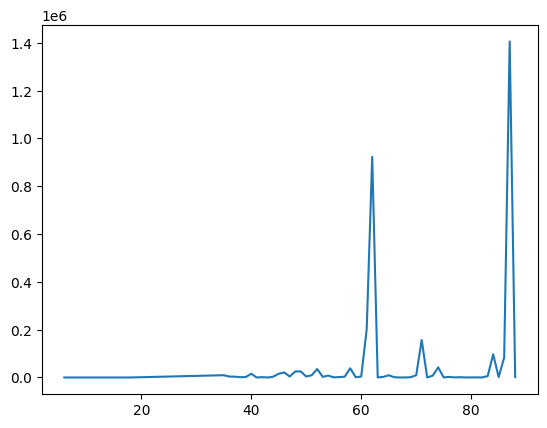

In [ ]:
plt.plot(comprehensive_features_train['F_x__abs_energy'])
plt.show()

In [ ]:
# impute 후 결측값 여부 확인 (True/False)
comprehensive_features_test.isna().values.any()


# =============
# 수행후 False로 결측치 없음

np.False_

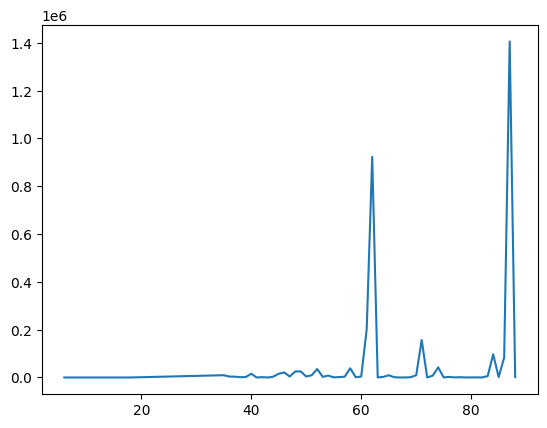

In [ ]:
plt.plot(comprehensive_features_test['F_x__abs_energy'])
plt.show()



In [ ]:
#  상위 20개만 출력
import pandas as pd

# pd.DataFrame(comprehensive_features_train.columns[:30], columns=["Feature Columns"])

for col in comprehensive_features_train.columns[:30]:
    print(col)


# DataFrame.columns는 Index 객체이므로 슬라이싱이 바로 가능하다. columns[:30]으로 첫 30개만 가져올 수 있다

F_x__variance_larger_than_standard_deviation
F_x__has_duplicate_max
F_x__has_duplicate_min
F_x__has_duplicate
F_x__sum_values
F_x__abs_energy
F_x__mean_abs_change
F_x__mean_change
F_x__mean_second_derivative_central
F_x__median
F_x__mean
F_x__length
F_x__standard_deviation
F_x__variation_coefficient
F_x__variance
F_x__skewness
F_x__kurtosis
F_x__root_mean_square
F_x__absolute_sum_of_changes
F_x__longest_strike_below_mean
F_x__longest_strike_above_mean
F_x__count_above_mean
F_x__count_below_mean
F_x__last_location_of_maximum
F_x__first_location_of_maximum
F_x__last_location_of_minimum
F_x__first_location_of_minimum
F_x__percentage_of_reoccurring_values_to_all_values
F_x__percentage_of_reoccurring_datapoints_to_all_datapoints
F_x__sum_of_reoccurring_values


In [ ]:
# 2. 특정 범위(예: 100~130번째) 출력
pd.DataFrame(comprehensive_features_train.columns[100:130], columns=["Feature Columns"])


,Feature Columns
0,F_x__autocorrelation__lag_9
1,"F_x__agg_autocorrelation__f_agg_""mean""__maxlag_40"
2,"F_x__agg_autocorrelation__f_agg_""median""__maxl..."
3,"F_x__agg_autocorrelation__f_agg_""var""__maxlag_40"
4,F_x__partial_autocorrelation__lag_0
5,F_x__partial_autocorrelation__lag_1
6,F_x__partial_autocorrelation__lag_2
7,F_x__partial_autocorrelation__lag_3
8,F_x__partial_autocorrelation__lag_4
9,F_x__partial_autocorrelation__lag_5


In [ ]:
comprehensive_features_train.head()

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.022809,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000


In [ ]:
comprehensive_features_test.head()

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.022809,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000


### 첫번째로 Random Forest 모델을 활용해보겠습니다.

In [ ]:
# ⑥-7 : RandomForest 사용 및 score 확인
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)

rf_clf.fit(comprehensive_features_train, y_train)


#=========
# max_depth=3   :  각 트리 깊이를 3으로 제한
# n_estimators=10  : 트리 10개로 구성된 앙상블
# fit :  학습 데이터와 레이블을 사용해 모델 학습 수행

# RandomForestClassifier를 사용하여 comprehensive_features_train과 y_train을 학습한 뒤, 모델이 정상적으로 학습되었음을 보여주는 출력


#===  수행 후 오류 설명 =======
# comprehensive_features_train에는 315개의 샘플,  y_train에는 67개의 샘플
# → 두 개의 샘플 수가 다르기 때문에 RandomForestClassifier의 학습 대상이 맞지 않음 → 즉, X와 y의 길이 불일치가 문제

RandomForestClassifier(max_depth=3, n_estimators=10)

In [ ]:
print(comprehensive_features_train.shape)
print(y_train.shape)

print(y_train.index.nunique())
print(comprehensive_features_train.index.nunique())


(67, 4662)
(67,)
67
67


In [ ]:
# test셋에 적합해본 결과 0.33 (LMS 경우 약 0.66)의 정확도를 보이며 불만족스러운 결과를 확인
rf_clf.score(comprehensive_features_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [21, 67]

### 두번째로 XGBoost를 활용하겠습니다.

In [ ]:
# ⑥-7 : XGBoost 사용 및 score 확인
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)

# XGBoost 모델을 학습시킵니다.
# [[YOUR CODE]]


# XGBoost 모델 학습
xgb_clf.fit(comprehensive_features_train, y_train)

# 예측 수행
y_pred = xgb_clf.predict(comprehensive_features_test)





In [ ]:
# XGBoost 모델의 score를 확인합니다.
# [[YOUR CODE]]


from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

print("XGBoost Accuracy Score:", score)

In [ ]:
# ⑥-8 : XGBoost plot_importance 확인 및 시각화
# plot_importance를 통해 어떤 변수(특징)가 가장 유의미한지 확인합니다.

xgb.plot_importance(xgb_clf, importance_type = 'gain')
plt.show()

In [ ]:
sum(xgb_clf.feature_importances_ != 0)


# Fx 값의 abs_energy 특징만의 유의미함

### 결국 고장 유무를 판별하는 기준은 F_X_abs_energy라는 특징 하나였습니다!

In [ ]:
# ⑥-9 : Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

- classification report를 통해 지표에서 설명하는 통계적인 수치가 각각 무엇인지 설명하고 이해하는 시간을 가져보도록 합시다.
- classification report에 나타나있는 true와 false에서 precision, recall, f1-score, support가 의미하는 것은 무엇일까요?